# Lesson 15 - KNN on MNIST Data

### The following topics are discussed in this notebook:
* Digit classification with KNN and MNIST dataset.


The MNIST dataset is a collection of 70,000 handwritten digits. Each digit is stored as a 28x28 array of integers between 1 and 255. Each array element stores the greyscale level of a pixel in a 28x28 image of the digit. 

MNIST stands for Modified National Institute of Standards and Technology. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.cm as cm

## Load the Dataset

In [2]:
mnist = fetch_mldata('MNIST original')
data = mnist["data"]
labels = mnist["target"]

print(type(data))
print(data.shape)

print(type(labels))
print(labels.shape)

<class 'numpy.ndarray'>
(70000, 784)
<class 'numpy.ndarray'>
(70000,)


## Find Nearest Neighbors

n: 3315


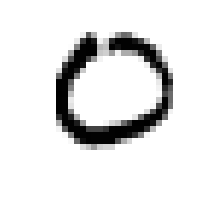

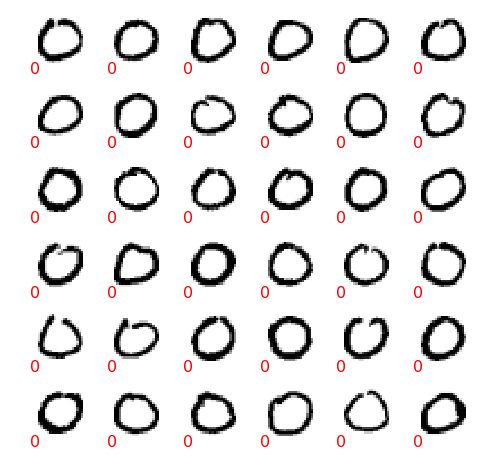

In [3]:
n = np.random.choice(range(70000))
print('n:', n)

mydigit = data[n,:]
mylabel = labels[n]

plt.close()
plt.rcParams["figure.figsize"] = [3,3]
plt.imshow(mydigit.reshape(28,28), cmap=cm.binary)
plt.axis('off')
plt.show()

distances = np.sum((data.astype(int) - mydigit.astype(int))**2, axis=1)
idx = np.argsort(distances)[:36]

data_sel = data[idx,:]
labels_sel = labels[idx]

plt.close()
plt.rcParams["figure.figsize"] = [8,8]
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(data_sel[i].reshape(28,28), cmap=cm.binary)
    plt.axis('off')
    plt.text(1, 28, s = str(int(labels_sel[i])), fontsize=16, color='r')
plt.show()


## Create Training, Testing, and Validation Sets

In [3]:
X_train, X_holdout, y_train, y_holdout = train_test_split(data, labels, test_size = 0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size = 0.5, random_state=1)


print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(56000,)
(7000,)
(7000,)


## Choosing K (Validation)

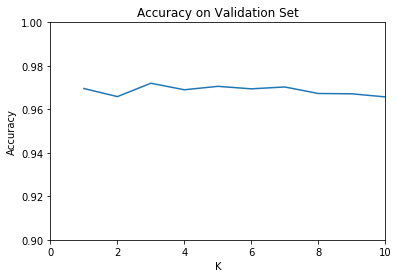

In [4]:
val_acc = []

for K in range(1,11):
    mod = KNeighborsClassifier(n_neighbors=K, algorithm='brute')
    mod.fit(X_train, y_train)
    temp = mod.score(X_val, y_val)
    val_acc.append(temp)
    
plt.close()
plt.plot(range(1,11), val_acc)
plt.ylim([0.9,1])
plt.xlim([0,10])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy on Validation Set')
plt.show()


## Training KNN Model (K=1)

In [5]:
mod = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
mod.fit(X_train, y_train)
print("Testing Accuracy:", mod.score(X_test, y_test))

Testing Accuracy: 0.974


## Assessing Model Performance

In [6]:
y_pred = mod.predict(X_test)

In [7]:
print(confusion_matrix(y_test, y_pred))

[[701   1   1   0   0   0   1   0   0   0]
 [  0 815   2   0   0   0   0   2   0   0]
 [  9   7 698   2   0   0   1   6   1   0]
 [  0   0   2 720   0  20   1   2   2   3]
 [  0   6   0   0 639   0   1   0   0  11]
 [  1   0   0   7   1 580   7   0   2   1]
 [  4   1   1   1   1   5 694   0   0   0]
 [  0   5   1   0   3   0   0 705   0   5]
 [  3   2   2  11   1   8   4   1 617   7]
 [  5   0   1   1   7   0   0   2   0 649]]


In [8]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98       704
        1.0       0.97      1.00      0.98       819
        2.0       0.99      0.96      0.97       724
        3.0       0.97      0.96      0.97       750
        4.0       0.98      0.97      0.98       657
        5.0       0.95      0.97      0.96       599
        6.0       0.98      0.98      0.98       707
        7.0       0.98      0.98      0.98       719
        8.0       0.99      0.94      0.97       656
        9.0       0.96      0.98      0.97       665

avg / total       0.97      0.97      0.97      7000

